Part 1

A. Diaramm:

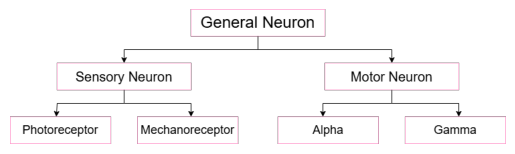

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread("C:\\Users\\Home\\Desktop\\Studies\\Phyton\\projects 2024-2025\\Diagramm.png")
plt.imshow(img)
plt.axis("off")
plt.show()


B.

In [2]:
# Base class for all neurons
class GeneralNeuron:
    def __init__(self, firing_rate):  # Base class attribute: firing_rate is a numerical value representing how frequently the neuron "fires"
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):  # Base class method: Calculates firing rate based on the strength of the stimulus
        pass


# Intermediate class for sensory neurons
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):  # Inherits firing_rate from the base class
        super().__init__(firing_rate)  # Unique attribute for sensory neurons: receptor_type indicates the stimulus type (e.g., "light" or "pressure")
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus_strength):  # Intermediate class method: Processes the stimulus and activates the neuron
        pass


# Intermediate class for motor neurons
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):  # Inherits firing_rate from the base class
        super().__init__(firing_rate)  # Unique attribute for motor neurons: target_muscle specifies the controlled muscle
        self.target_muscle = target_muscle

    def control_muscle(self, activation_level):  # Intermediate class method: Triggers a response in the target muscle
        pass


# Leaf class for photoreceptors (a type of sensory neuron)
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")  # Fixed receptor_type as "light"

    def light_detection(self, light_intensity):  # Leaf class method: Calculates the firing rate based on light intensity
        pass


# Leaf class for mechanoreceptors (a type of sensory neuron)
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")  # Fixed receptor_type as "pressure"

    def pressure_detection(self, pressure_level):  # Leaf class method: Calculates the firing rate based on pressure level
        pass


# Leaf class for alpha motor neurons (a type of motor neuron)
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")  # Fixed target_muscle as "skeletal muscle"

    def skeletal_muscle_control(self, activation_level):  # Leaf class method: Controls skeletal muscle contraction
        pass


# Leaf class for gamma motor neurons (a type of motor neuron)
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")  # Fixed target_muscle as "muscle spindle"

    def muscle_spindle_control(self, activation_level):  # Leaf class method: Adjusts muscle spindle tension
        pass

Part 2.

Q1:

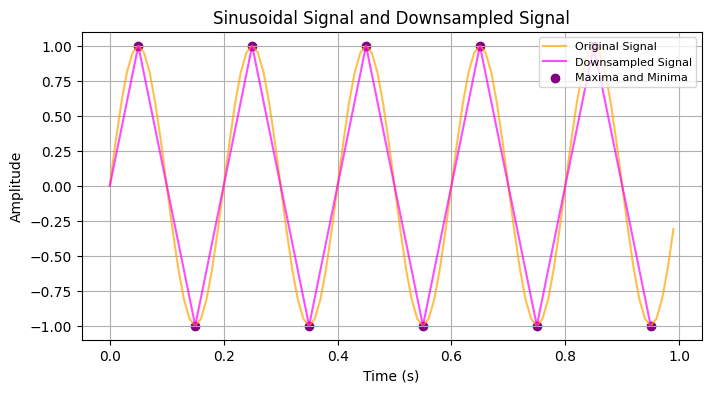

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Q1:

# Function to downsample a sinusoidal signal while preserving maxima and minima
def sample_sinusoidal(signal, sampling_rate=5):

    maxima_indices = np.where((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:]))[0] + 1
    minima_indices = np.where((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:]))[0] + 1

    # Combine and sort indices
    critical_points = np.sort(np.concatenate((maxima_indices, minima_indices)))

    # Downsample the signal
    downsampled_indices = np.arange(0, len(signal), sampling_rate)
    selected_indices = np.unique(np.concatenate((downsampled_indices, critical_points)))
    sampled_signal=signal[selected_indices]

    return sampled_signal, selected_indices, maxima_indices, minima_indices

# Generate a sinusoidal signal with a frequency of 5 Hz and a sampling interval of 0.01 seconds
time = np.arange(0, 1, 0.01)
original_signal = np.sin(2 * np.pi * 5 * time)

# Downsample the signal and get the indices of the selected points (maxima and minima)
sampled_signal, selected_indices, maxima_indices, minima_indices = sample_sinusoidal(original_signal)

# Plot the original and downsampled signals
plt.figure(figsize=(8, 4))
plt.plot(time, original_signal, label="Original Signal", alpha=0.7, color = "orange")
plt.plot(time[selected_indices], sampled_signal, label="Downsampled Signal", alpha=0.7, color = "magenta")
# Plot the maxima and minima as scatter points on the signal
plt.scatter(time[maxima_indices], original_signal[maxima_indices], color="purple", label="Maxima and Minima")
plt.scatter(time[minima_indices], original_signal[minima_indices], color="purple")
plt.title("Sinusoidal Signal and Downsampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc="upper right", fontsize=8)
plt.grid()
plt.show()


Q2:

a. Company with the most expensive laptops on average and average price for each company.

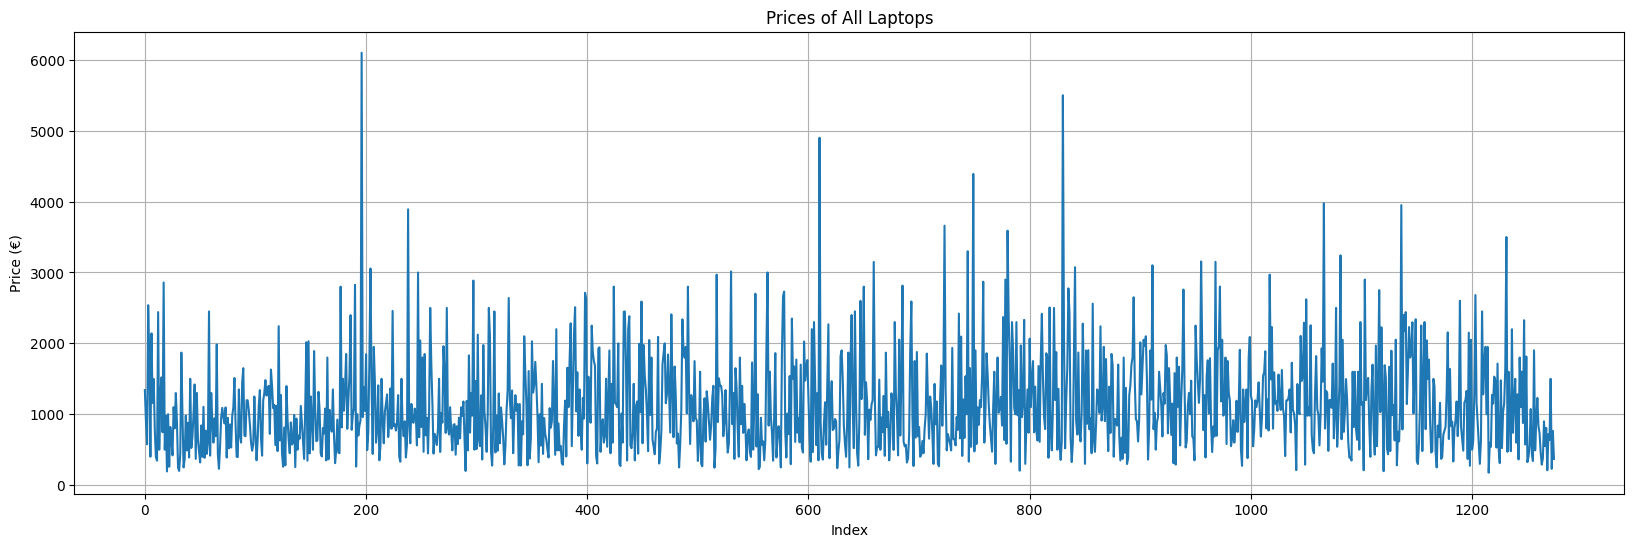

Company with the most expensive laptops on average: Razer - 3346.14€

Average price for each company:
Acer          633.46€
Apple        1564.20€
Asus         1123.83€
Chuwi         314.30€
Dell         1199.23€
Fujitsu       729.00€
Google       1677.67€
HP           1080.31€
Huawei       1424.00€
LG           2099.00€
Lenovo       1093.86€
MSI          1728.91€
Mediacom      295.00€
Microsoft    1612.31€
Razer        3346.14€
Samsung      1413.44€
Toshiba      1267.81€
Vero          217.43€
Xiaomi       1133.46€


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset_path = "C:\\Users\\Home\\Desktop\\Studies\\Phyton\\projects 2024-2025\\laptop_price - dataset.csv"
laptops = pd.read_csv(dataset_path)

# Plot the price of all laptops
plt.figure(figsize=(20, 6))
plt.plot(laptops["Price (Euro)"])
plt.title("Prices of All Laptops")
plt.xlabel("Index")
plt.ylabel("Price (€)")
plt.grid()
plt.show()

# Find the company with the most expensive laptops on average
avg_prices_by_company = laptops.groupby("Company")["Price (Euro)"].mean()
most_expensive_company = avg_prices_by_company.idxmax()
most_expensive_price = avg_prices_by_company.max()
print(f"Company with the most expensive laptops on average: {most_expensive_company} - {most_expensive_price:.2f}€")

# Average laptop price by company
avg_prices_by_company_with_sign = avg_prices_by_company.apply(lambda x: f"{x:.2f}€") # Adds a euro sign to each price
print(f"\nAverage price for each company:\n{avg_prices_by_company_with_sign.to_string(header=False)}")

b. Price Distribution for Different Operating Systems

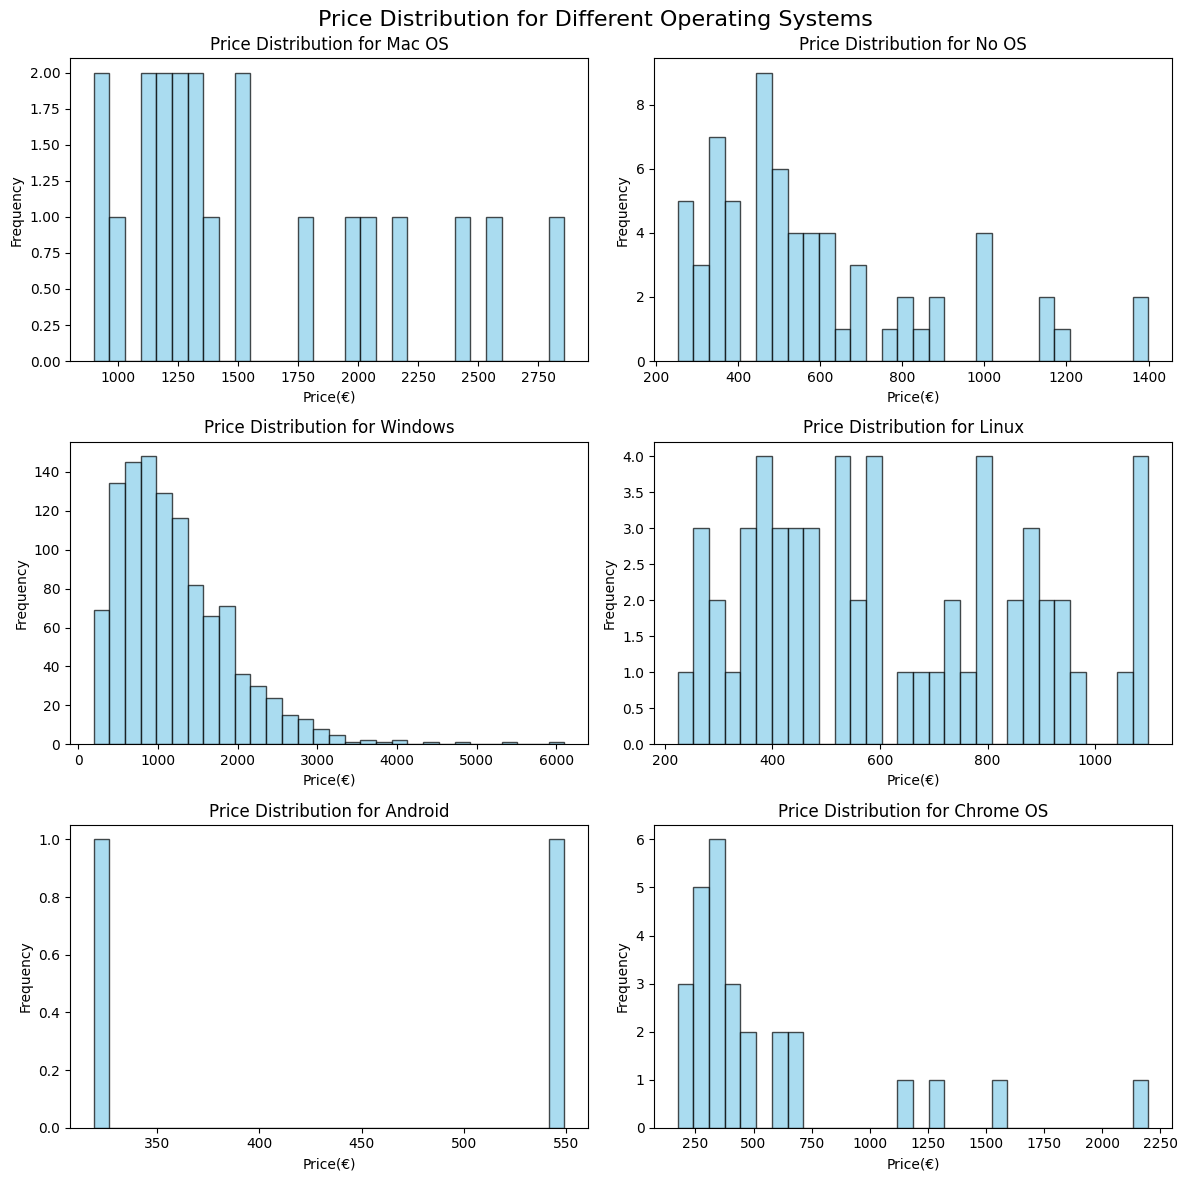

In [13]:
import matplotlib.pyplot as plt
import pandas as pd


# Define the function to standardize OS names
def standardize_os(os_name):
    # Convert to lowercase and remove leading/trailing spaces for consistency
    os_name = os_name.lower().strip()
    if "windows" in os_name:
        return "Windows"
    if "chrome" in os_name:
        return "Chrome OS"
    if "linux" in os_name:
        return "Linux"
    if "mac" in os_name:
        return "Mac OS"
    if "no os" in os_name:
        return "No OS"
    if "android" in os_name:
        return "Android"
    # If no match is found, return the original name (or handle as needed)
    return os_name

# Load the dataset
dataset_path = "C:\\Users\\Home\\Desktop\\Studies\\Phyton\\projects 2024-2025\\laptop_price - dataset.csv"
laptops = pd.read_csv(dataset_path)

# Standardize the OS names using the function
laptops["OpSys"] = laptops["OpSys"].apply(standardize_os)

# Get unique OS names after standardization
unique_os = laptops["OpSys"].unique()

# Determine the number of subplots needed (rows, columns)
num_os = len(unique_os)
cols = 2  # Number of columns for subplots (can adjust this as needed)
rows = (num_os + cols - 1) // cols  # Automatically calculate the number of rows based on number of OS

# Create the subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

# Flatten the axes array to make it easy to index
axes = axes.flatten()

# Plot the price distribution for each operating system
for graph, OS in enumerate(unique_os):
    subset = laptops[laptops["OpSys"] == OS]
    axes[graph].hist(subset["Price (Euro)"], alpha=0.7, bins=30, edgecolor="black",color="skyblue")
    axes[graph].set_title(f"Price Distribution for {OS}")
    axes[graph].set_ylabel("Frequency")
    axes[graph].set_xlabel("Price(€)")

# Turn off any unused axes (in case there are fewer OS than subplots)
for _i in range(num_os, len(axes)):
    axes[graph].axis("off")

 # Add a global title
fig.suptitle("Price Distribution for Different Operating Systems", fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

c. Relationship between RAM and Price

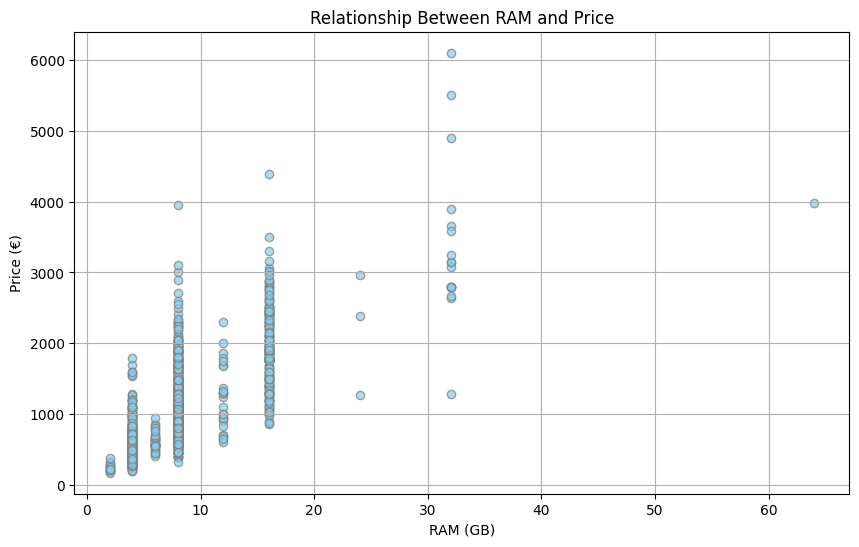

In [6]:
# Relationship between RAM and Price
plt.figure(figsize=(10, 6))
plt.scatter(laptops["RAM (GB)"], laptops["Price (Euro)"], alpha=0.7, color="skyblue", edgecolor="gray")
plt.title("Relationship Between RAM and Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (€)")
plt.grid()
plt.show()


The graph shows a positive correlation, indicating that as RAM increases, the price of the computer also tends to rise.

d. Creating a new column for storage type.

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1270              SSD
1271              SSD
1272    Flash Storage
1273              HDD
1274              HDD
Name: Storage type, Length: 1275, dtype: object


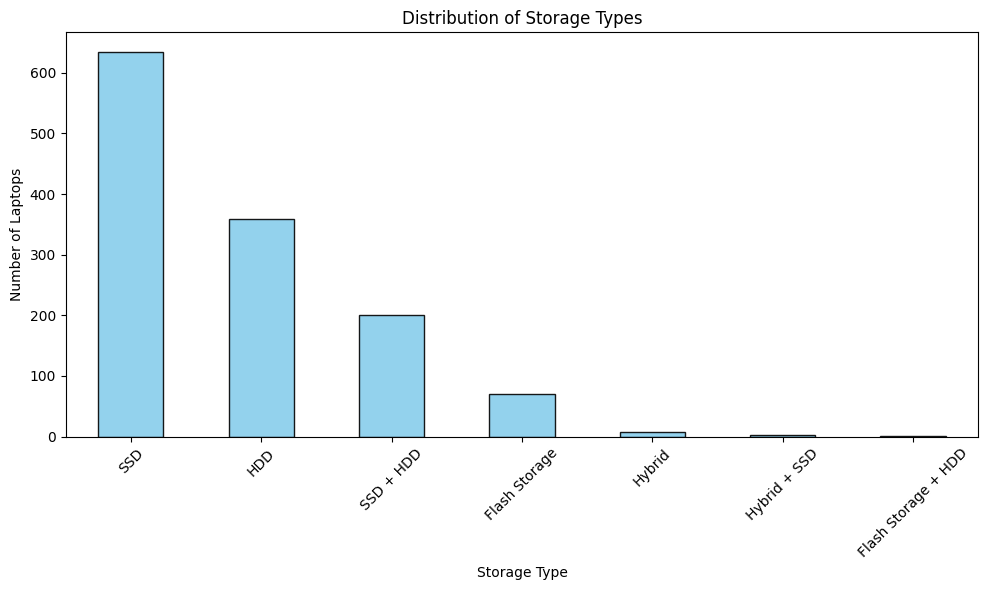

In [331]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into a DataFrame
laptops = pd.read_csv(dataset_path)

# Extract storage types from the "Memory" column and handle duplicates
laptops["Storage type"] = laptops["Memory"].apply(
    lambda memory: " + ".join(  # Join the extracted storage types with ' + ' as a separator
        {
            " ".join(part.strip().split()[-2:])  # If the part has more than 2 words, take the last 2 words
            if len(part.strip().split()) > 2
            else part.strip().split()[-1]  # Otherwise, take the last word
            for part in memory.split("+")  # Split the memory string by '+' to handle multiple storage specifications
        }
    ) if "+" in memory
    else (
        " ".join(memory.split()[-2:])  # If more than 2 words, take the last 2 words
        if len(memory.split()) > 2
        else memory.split()[-1]  # Otherwise, take the last word for a single storage specification
    )
)


# Print the extracted "Storage type" column to verify the results
print(laptops["Storage type"])

# Save the updated DataFrame with the new "Storage type" column
laptops.to_csv(dataset_path, index=False)

# Plot the distribution of storage types
plt.figure(figsize=(10, 6))
laptops["Storage type"].value_counts().plot(kind="bar", edgecolor="black", color= "skyblue", alpha=0.9)
plt.title("Distribution of Storage Types")
plt.xlabel("Storage Type")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("storage_type_distribution.png")
plt.show()

Bonus question

a. Additional questions:
   1. ***What is the relationship between the processor type and laptop price?***  
      **Analysis:** Compare laptop prices based on processor types.  
      **Visualization:** A bar chart or boxplot displaying price distribution by processor type.
   2. ***How does the screen size influence the price of laptops?***  
      **Analysis**: Compare average laptop prices for different screen sizes.  
      **Visualization:** A bar chart or boxplot displaying price distribution by screen size.  
   3. ***How does the GPU brand (GPU_Company) affect the price of laptops?***  
      **Analysis:** Compare laptop prices based on the GPU brand and analyze whether certain GPU brands correlate with higher or lower prices. 
      **Visualization:** A bar chart comparing average laptop prices by GPU brand.  
   4. ***How does the storage type (HDD vs SSD) affect laptop price?***  
      **Analysis:** Compare laptop prices based on storage types (SSD, HDD).  
      **Visualization:** A bar chart or boxplot showing price distribution by storage type.  
   5. ***How does the weight of a laptop correlate with its price?***  
      **Analysis:** Investigate if heavier laptops are more expensive on average.  
      **Visualization:** A scatter plot showing the relationship between laptop weight and price.  
        
      **Questions for implementation:**  
      1. How does the GPU brand (GPU_Company) affect the price of laptops?
      2. How does the storage type (HDD vs SSD) affect laptop price?


b.  
1. How does the GPU brand (GPU_Company) affect the price of laptops?

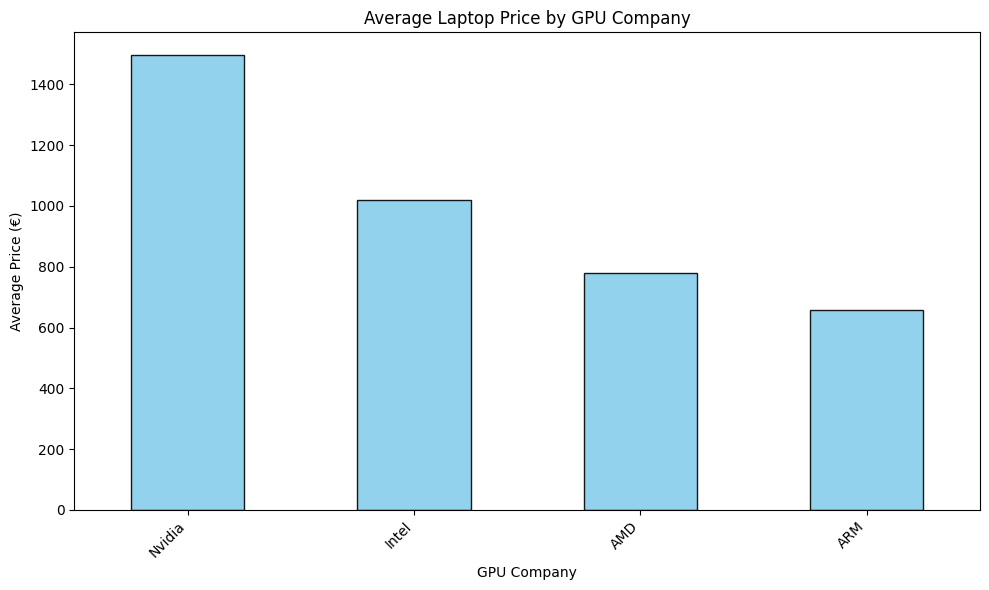

The most expensive laptops are those with an Nvidia GPU, with an average price of 1496.7€


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset_path = "C:\\Users\\Home\\Desktop\\Studies\\Phyton\\projects 2024-2025\\laptop_price - dataset.csv"
laptops = pd.read_csv(dataset_path)

# Check for unique GPU companies
unique_gpu_companies = laptops["GPU_Company"].dropna().unique()

# Calculate the average price for each GPU company
avg_price_by_gpu = laptops.groupby("GPU_Company")["Price (Euro)"].mean().sort_values(ascending=False)

# Identify the most expensive GPU
most_expensive_gpu = avg_price_by_gpu.idxmax()
average_price = avg_price_by_gpu.max()


# Plotting the average price by GPU company
plt.figure(figsize=(10, 6))
avg_price_by_gpu.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.9)
plt.title("Average Laptop Price by GPU Company")
plt.xlabel("GPU Company")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Print the results
print(f"The most expensive laptops are those with an {most_expensive_gpu} GPU, with an average price of {average_price:.1f}€")

2. How does the storage type (HDD vs SSD) affect laptop price?

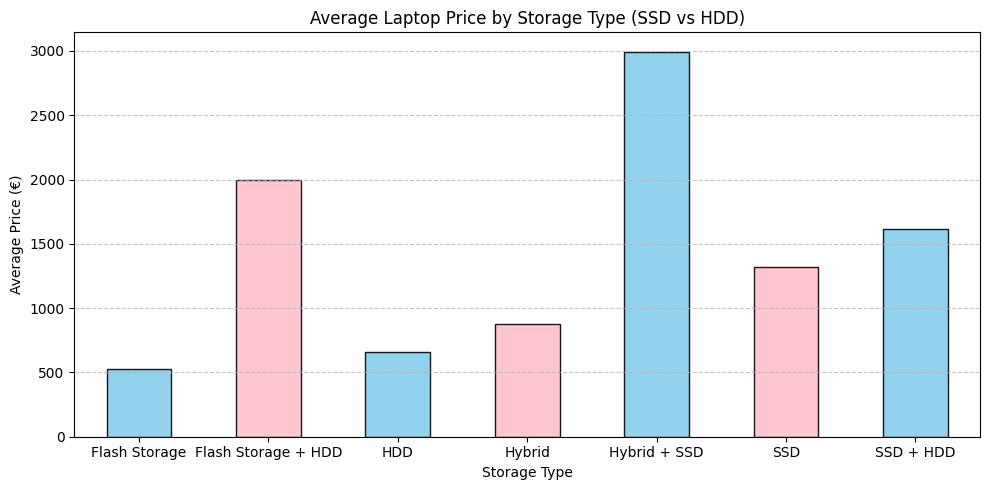

The most expensive laptops are those with Hybrid + SSD storage: 2995.0€


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

#I use the data file that was updated with "Storage type" column before

# Group by storage type and calculate average price
avg_price_by_storage = laptops.groupby("Storage type")["Price (Euro)"].mean()

# Identify the most expensive storage type
most_expensive_storage = avg_price_by_storage.idxmax()
average_price = avg_price_by_storage.max()


# Plot the price distribution by storage type using a bar chart
plt.figure(figsize=(10, 5))
avg_price_by_storage.plot(kind="bar", color=["skyblue", "pink"], edgecolor="black", alpha=0.9)
plt.title("Average Laptop Price by Storage Type (SSD vs HDD)")
plt.xlabel("Storage Type")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Show the result
print(f"The most expensive laptops are those with {most_expensive_storage} storage: {average_price:.1f}€")

A GitHub Link to the project: https://github.com/OistrakhAleksandra/Project_1